1. Import Libraries and Load Data

In [1]:
# Import essential data manipulation and file handling libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

2. Load and Merge Case Data Files

In [2]:
# Define the directory containing case data files
data_dir = Path('/Users/priyashhagulati/Library/CloudStorage/GoogleDrive-gulati.priyashha@gmail.com/My Drive/ADA_Judiciary/cases')

# Load individual year files
df_2018 = pd.read_csv(data_dir / "cases_2018.csv")
df_2017 = pd.read_csv(data_dir / "cases_2017.csv")
df_2016 = pd.read_csv(data_dir / "cases_2016.csv")

# Merge all years vertically (append rows)
df_all = pd.concat([df_2016, df_2017, df_2018], ignore_index=True)

# Display first few rows of merged dataset
df_all.head()

,ddl_case_id,year,state_code,dist_code,court_no,cino,judge_position,female_defendant,female_petitioner,female_adv_def,female_adv_pet,type_name,purpose_name,disp_name,date_of_filing,date_of_decision,date_first_list,date_last_list,date_next_list
0,01-01-01-201900000012016,2016,1,1,1,MHNB030000032016,chief judicial magistrate,0 male,0 male,-9999,0,1940.0,767.0,26,2016-01-02,2016-02-16,2016-01-02,2016-02-16,2016-02-16
1,01-01-01-201900000022016,2016,1,1,1,MHNB030000042016,chief judicial magistrate,0 male,0 male,-9999,0,1940.0,767.0,26,2016-01-02,2016-02-16,2016-01-02,2016-02-16,2016-02-16
2,01-01-01-201900000032016,2016,1,1,1,MHNB030000052016,chief judicial magistrate,0 male,1 female,-9999,0,1940.0,4878.0,43,2016-01-02,2016-02-13,2016-01-02,2016-02-13,2016-02-13
3,01-01-01-201900000042016,2016,1,1,1,MHNB030000062016,chief judicial magistrate,0 male,0 male,-9999,1,1940.0,7430.0,23,2016-01-05,2017-06-07,2016-01-05,2017-06-07,2017-06-07
4,01-01-01-201900000052016,2016,1,1,1,MHNB030000072016,chief judicial magistrate,0 male,0 male,-9999,0,1940.0,5251.0,26,2016-01-06,2016-02-18,2016-01-06,2016-02-18,2016-02-18


3. Load and Filter Acts/Sections Details

In [3]:
# Load detailed acts and sections data
df_details = pd.read_csv("acts_sections.csv")

# Extract year from case ID (last 4 characters)
df_details["year"] = df_details["ddl_case_id"].str[-4:].astype(int)

# Filter for relevant years (2016-2018)
filtered_df = df_details[df_details["year"].isin([2016, 2017, 2018])]

# Display filtered data
filtered_df.head()

,ddl_case_id,act,section,bailable_ipc,number_sections_ipc,criminal,year
2,13-18-03-204000030972016,17353.0,NaN,NaN,1.0,1,2016
3,23-28-01-220102000232016,4759.0,NaN,NaN,NaN,1,2016
6,03-20-02-201200220682017,4759.0,NaN,NaN,NaN,1,2017
9,08-11-01-215200008432018,17353.0,NaN,NaN,1.0,1,2018
10,10-08-09-232500013122017,4759.0,NaN,NaN,NaN,1,2017


4. Merge Case Data with Details

In [4]:
# Inner join case data with acts/sections details on case ID
merged_df = filtered_df.merge(
    df_all,
    on="ddl_case_id",
    how="inner"
)

# Display merged data structure
merged_df.head()
print("Merged DataFrame shape:", merged_df.shape)

# Drop duplicate year column and rename for clarity
df = merged_df.drop(columns=["year_y"]).rename(columns={"year_x": "year"})

# Display column information
print("Dataset Shape:", df.shape)
print("\nColumns and Non-Null Counts:")
print(df.info())

Merged DataFrame shape: (36480733, 25)
Dataset Shape: (36480733, 24)

Columns and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36480733 entries, 0 to 36480732
Data columns (total 24 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ddl_case_id          object 
 1   act                  float64
 2   section              float64
 3   bailable_ipc         object 
 4   number_sections_ipc  float64
 5   criminal             int64  
 6   year                 int64  
 7   state_code           int64  
 8   dist_code            int64  
 9   court_no             int64  
 10  cino                 object 
 11  judge_position       object 
 12  female_defendant     object 
 13  female_petitioner    object 
 14  female_adv_def       int64  
 15  female_adv_pet       int64  
 16  type_name            float64
 17  purpose_name         float64
 18  disp_name            int64  
 19  date_of_filing       object 
 20  date_of_decision     object 
 21 

5. Missing Value Analysis

In [5]:
# Calculate and display missing values for each column
missing_values = df.isna().sum()
total_rows = df.shape[0]

for col, num_missing in missing_values.items():
    percent_missing = round(num_missing/total_rows*100)
    print(f"Column '{col}' has {num_missing} missing values which is {percent_missing}% of total")

Column 'ddl_case_id' has 0 missing values which is 0% of total
Column 'act' has 4458 missing values which is 0% of total
Column 'section' has 1453049 missing values which is 4% of total
Column 'bailable_ipc' has 27617280 missing values which is 76% of total
Column 'number_sections_ipc' has 26972922 missing values which is 74% of total
Column 'criminal' has 0 missing values which is 0% of total
Column 'year' has 0 missing values which is 0% of total
Column 'state_code' has 0 missing values which is 0% of total
Column 'dist_code' has 0 missing values which is 0% of total
Column 'court_no' has 0 missing values which is 0% of total
Column 'cino' has 0 missing values which is 0% of total
Column 'judge_position' has 0 missing values which is 0% of total
Column 'female_defendant' has 0 missing values which is 0% of total
Column 'female_petitioner' has 0 missing values which is 0% of total
Column 'female_adv_def' has 0 missing values which is 0% of total
Column 'female_adv_pet' has 0 missing v

6. Date Data Cleaning and Validation

In [6]:
# Convert date columns to datetime format
df['date_of_filing'] = pd.to_datetime(df['date_of_filing'], errors='coerce', format='mixed')
df['date_first_list'] = pd.to_datetime(df['date_first_list'], errors='coerce', format='mixed')
df['date_of_decision'] = pd.to_datetime(df['date_of_decision'], errors='coerce', format='mixed')

# Check for chronological inconsistencies
print("Chronological Logic Violations (Before Fix):")
checks_before = {
    "first_list_before_filing": (df['date_first_list'] < df['date_of_filing']).sum(),
    "decision_before_filing": (df['date_of_decision'] < df['date_of_filing']).sum(),
    "first_list_after_decision": (df['date_first_list'] > df['date_of_decision']).sum(),
}

for check, count in checks_before.items():
    print(f"{check}: {count:,} cases")

# Fix invalid dates
df.loc[df['date_first_list'] < df['date_of_filing'], 'date_first_list'] = pd.NaT
df.loc[df['date_of_decision'] < df['date_of_filing'], 'date_of_decision'] = pd.NaT
df.loc[df['date_first_list'] > df['date_of_decision'], 'date_first_list'] = pd.NaT

# Validate unrealistic future dates
for col in ['date_of_filing', 'date_first_list']:
    invalid_mask = (df[col].dt.year < 1900) | (df[col].dt.year > 2100)
    invalid_dates = df.loc[invalid_mask, col]
    print(f"\nInvalid entries in '{col}': {len(invalid_dates)} found")
    print(invalid_dates.unique()[:20])

# Remove unrealistic dates
for col in ['date_of_filing', 'date_first_list']:
    df.loc[(df[col].dt.year < 1900) | (df[col].dt.year > 2100), col] = pd.NaT

# Create flag for missing first list dates
df['date_first_list_missing'] = df['date_first_list'].isna().astype(int)

# Fill missing first list dates with filing dates
df['date_first_list'] = df['date_first_list'].fillna(df['date_of_filing'])

# Verify no missing values remain
print("Missing first_list dates after imputation:", df['date_first_list'].isna().sum())

Chronological Logic Violations (Before Fix):
first_list_before_filing: 94,358 cases
decision_before_filing: 178,441 cases
first_list_after_decision: 498,067 cases

Invalid entries in 'date_of_filing': 0 found
<DatetimeArray>
[]
Length: 0, dtype: datetime64[ns]

Invalid entries in 'date_first_list': 327 found
<DatetimeArray>
['2107-12-01 00:00:00', '2101-12-15 00:00:00', '2109-01-04 00:00:00',
 '2201-10-06 00:00:00', '2107-02-11 00:00:00', '2118-04-06 00:00:00',
 '2107-12-16 00:00:00', '2109-01-19 00:00:00', '2106-09-20 00:00:00',
 '2118-09-07 00:00:00', '2108-02-20 00:00:00', '2108-12-31 00:00:00',
 '2108-10-29 00:00:00', '2201-09-30 00:00:00', '2108-12-11 00:00:00',
 '2107-12-27 00:00:00', '2107-03-14 00:00:00', '2107-10-28 00:00:00',
 '2107-04-20 00:00:00', '2106-12-31 00:00:00']
Length: 20, dtype: datetime64[ns]
Missing first_list dates after imputation: 0


7. Calculate Case Duration

In [7]:
# Calculate raw case duration in days
df['case_duration_days'] = (df['date_of_decision'] - df['date_of_filing']).dt.days

# Create event indicator (1 if case decided, 0 if pending)
df["event"] = df["date_of_decision"].notna().astype(int)

# Calculate observed duration with reference date for pending cases
REFERENCE_DATE = pd.Timestamp("2020-12-31")
df["observed_duration"] = np.where(
    df["event"] == 1,
    (df["date_of_decision"] - df["date_of_filing"]).dt.days,
    (REFERENCE_DATE - df["date_of_filing"]).dt.days
)

# Remove absurd or negative values
df.loc[df["observed_duration"] > 5000, "observed_duration"] = np.nan
df.loc[df["observed_duration"] < 0, "observed_duration"] = np.nan

8. Survival Analysis-Based Imputation

In [8]:
print("Starting survival imputation...")

# Select valid closed cases for Kaplan-Meier estimation
closed = df[(df["event"] == 1) & 
            df["observed_duration"].notna() & 
            (df["observed_duration"] >= 2)]["observed_duration"].values

closed = np.sort(closed)
n = len(closed)
print("Closed cases used for imputation:", n)

# Build survival curve grid
GRID_SIZE = 1000
min_t = int(np.percentile(closed, 1))
max_t = int(np.percentile(closed, 99))
grid_times = np.linspace(min_t, max_t, GRID_SIZE)

# Calculate survival probabilities
survival_prob = 1 - (np.searchsorted(closed, grid_times, side="right") / n)

# Compute expected remaining time using survival analysis
S = survival_prob
t = grid_times
dt = np.diff(t)
areas = 0.5 * (S[:-1] + S[1:]) * dt
cum_area = np.concatenate(([0], np.cumsum(areas)))
total_area = cum_area[-1]
area_tail = total_area - cum_area
E_remaining = np.where(S > 0, area_tail / S, 0)
E_remaining = np.clip(E_remaining, 0, 3650)  # Cap at 10 years

print("Finished computing expected remaining times")

# Impute missing case durations
mask_missing = df["case_duration_days"].isna()
t0 = df.loc[mask_missing, "observed_duration"].values
median_obs = df["observed_duration"].median()
t0_clean = np.where(np.isnan(t0), median_obs, t0)

# Find nearest grid points and add expected remaining time
nearest_idx = np.searchsorted(grid_times, t0_clean, side="left")
nearest_idx = np.clip(nearest_idx, 0, GRID_SIZE - 1)
extra = E_remaining[nearest_idx]
df.loc[mask_missing, "case_duration_days"] = t0_clean + extra

# Create imputed decision dates
df["date_of_decision_imputed"] = (
    df["date_of_filing"] + pd.to_timedelta(df["case_duration_days"], unit="D")
)

print("Imputation complete.")
print("Still missing case durations:", df['case_duration_days'].isna().sum())

Starting survival imputation...
Closed cases used for imputation: 18009471
Finished computing expected remaining times
Imputation complete.
Still missing case durations: 0


9. Clean Gender Variables

In [9]:
# Define mapping for gender string values
gender_map_str = {'0 male': 0, '1 female': 1}

print("Gender Values (Before Cleaning):")
for col in ['female_defendant', 'female_petitioner', 'female_adv_def', 'female_adv_pet']:
    print(col, df[col].unique())

# Clean string gender columns
for col in ['female_defendant', 'female_petitioner']:
    df[col] = df[col].astype(str)
    df[col] = df[col].replace({
        '-9998 unclear': np.nan,
        '-9999 missing name': np.nan,
        '': np.nan
    })
    df[col] = df[col].map(gender_map_str)

# Clean numeric gender columns
for col in ['female_adv_def', 'female_adv_pet']:
    df[col] = df[col].replace({-9998: np.nan, -9999: np.nan})

print("\nGender Values (After Cleaning):")
for col in ['female_defendant', 'female_petitioner', 'female_adv_def', 'female_adv_pet']:
    print(col, df[col].unique())

# Fill NaN with -1 and convert to integer for categorical encoding
df['female_defendant'] = df['female_defendant'].fillna(-1).astype(int)
df['female_petitioner'] = df['female_petitioner'].fillna(-1).astype(int)

# Verify encoding
for col in ['female_defendant', 'female_petitioner']:
    print(col, df[col].unique())

Gender Values (Before Cleaning):
female_defendant ['0 male' '-9998 unclear' '1 female' '-9999 missing name']
female_petitioner ['-9998 unclear' '0 male' '1 female' '-9999 missing name']
female_adv_def [-9998 -9999     0     1]
female_adv_pet [    1 -9999     0 -9998]

Gender Values (After Cleaning):
female_defendant [ 0. nan  1.]
female_petitioner [nan  0.  1.]
female_adv_def [nan  0.  1.]
female_adv_pet [ 1. nan  0.]
female_defendant [ 0 -1  1]
female_petitioner [-1  0  1]


10. Create Composite Location Variables

In [10]:
# Combine state, district, and court into composite identifiers
df["court_details"] = df["state_code"].astype(str) + "-" + df["dist_code"].astype(str) + "-" + df["court_no"].astype(str)
df["state_district"] = df["state_code"].astype(str) + "-" + df["dist_code"].astype(str)

In [12]:
df.head() 

,ddl_case_id,act,section,bailable_ipc,number_sections_ipc,criminal,year,state_code,dist_code,court_no,...,date_first_list,date_last_list,date_next_list,date_first_list_missing,case_duration_days,event,observed_duration,date_of_decision_imputed,court_details,state_district
0,13-18-03-204000030972016,17353.0,NaN,NaN,1.0,1,2016,13,18,3,...,2016-07-15,2016-07-15,2016-07-15,0,0.0,1,0.0,2016-07-15,13-18-3,13-18
1,23-28-01-220102000232016,4759.0,NaN,NaN,NaN,1,2016,23,28,1,...,2016-03-08,2016-03-08,2016-03-08,0,5.0,1,5.0,2016-03-08,23-28-1,23-28
2,03-20-02-201200220682017,4759.0,NaN,NaN,NaN,1,2017,3,20,2,...,2017-10-03,2019-02-02,2019-02-12,0,1221.0,0,1221.0,2020-12-31,3-20-2,3-20
3,08-11-01-215200008432018,17353.0,NaN,NaN,1.0,1,2018,8,11,1,...,2018-07-02,2018-07-02,2018-07-02,0,2.0,1,2.0,2018-07-02,8-11-1,8-11
4,10-08-09-232500013122017,4759.0,NaN,NaN,NaN,1,2017,10,8,9,...,2017-04-28,2017-04-29,2017-04-29,0,3.0,1,3.0,2017-04-29,10-8-9,10-8


11. Reduced Dataset for Analysis

In [13]:
# Define columns to drop for reduced analysis dataset
columns_to_drop = [
    'ddl_case_id', 'year', 'cino', 'purpose_name', 'disp_name', 
    'female_adv_def', 'female_adv_pet', 'state_code', 
    'dist_code', 'court_no', 'date_last_list', 
    'date_next_list', 'date_of_decision', 'date_first_list_missing', 'observed_duration', 'date_of_decision_imputed'
]

# Create reduced dataset
df_reduced = df.drop(columns=columns_to_drop, axis=1)

# Display reduced dataset structure
df_reduced.head()
print("\nReduced dataset missing values:")
print(df_reduced.isna().sum())


Reduced dataset missing values:
act                        4458
section                 1453049
bailable_ipc           27617280
number_sections_ipc    26972922
criminal                      0
judge_position                0
female_defendant              0
female_petitioner             0
type_name                    43
date_of_filing                0
date_first_list               0
case_duration_days            0
event                         0
court_details                 0
state_district                0
dtype: int64


12. Apply Log Transformation to Case Duration

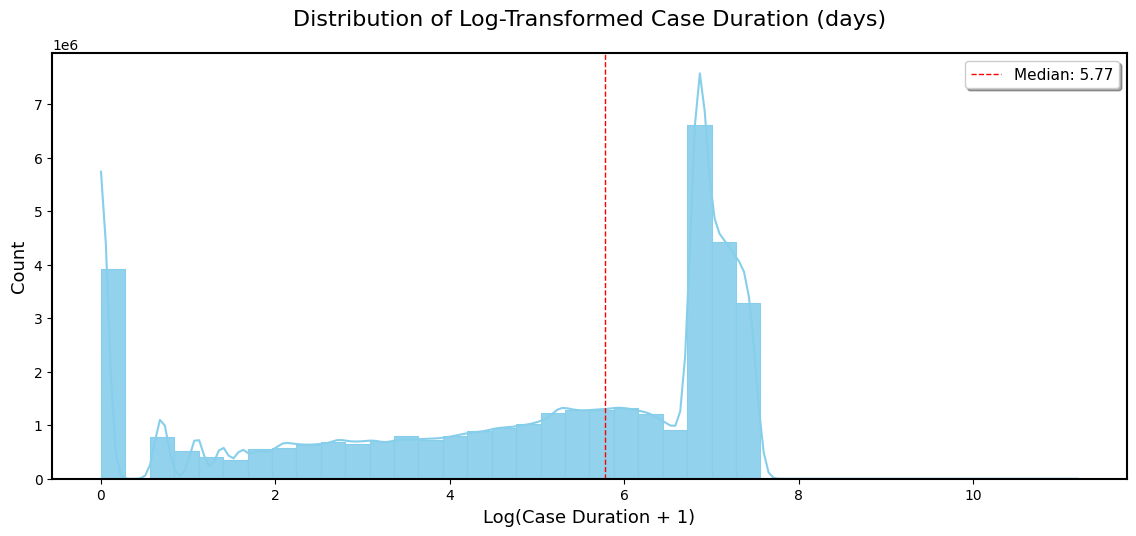

In [14]:
# Apply log(1+x) transformation to handle skewed duration distribution
df['log_case_duration'] = np.log1p(df['case_duration_days'])

# Create visualization of log-transformed distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['log_case_duration'], bins=40, kde=True, color='skyblue', 
             edgecolor='skyblue', linewidth=0.8, alpha=0.9)

# Add median line
median_val = df['log_case_duration'].median()
plt.axvline(median_val, color='red', linestyle='--', linewidth=1, 
            label=f'Median: {median_val:.2f}')

# Format plot
plt.xlabel("Log(Case Duration + 1)", fontsize=13)
plt.ylabel("Count", fontsize=13)
plt.title("Distribution of Log-Transformed Case Duration (days)", 
          fontsize=16, fontweight='regular', pad=20)
plt.legend(fontsize=11, frameon=True, shadow=True, loc='upper right')

# Add clean frame
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)

plt.tight_layout(pad=3)
plt.show()

13. Save Cleaned Dataset

In [ ]:
# Export cleaned dataset to CSV for further analysis
df_reduced.to_csv("cases_cleaned.csv", index=False)
print("Cleaned dataset saved to 'cases_cleaned.csv'")

Cleaned dataset saved to 'cases_cleaned.csv'


: 